# Diamonds End-To-End Project



## Information about the data

*  Analyze diamonds by their cut, color, clarity, price, and other attributes
*  This classic dataset contains the prices and other attributes of almost 54,000 diamonds. 


index | Column name | Type | Description| Data Range
------|-------------|------|------------|------------
1. | carat | Numeric | weight of the diamond | (0.2--5.01)
2. | cut | String | Describe cut quality of the diamond. Quality in increasing order Fair, Good, Very Good, Premium, Ideal | (Fair, Good, Very Good, Premium, Ideal)
3. | color | String | Color of the diamond | from J (worst) to D (best)
4. | clarity | String | How obvious inclusions are within the diamond | (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
5. | depth | Numeric | The height of a diamond, measured from the culet to the table, divided by its average girdle diameter  = z  mean(x, y) = 2 * z / (x + y)| (43--79)
6. | table | Numeric | The width of the diamond's table expressed as a percentage of its average diameter | (43--95)
7. | price | Numeric | the price of the diamond | \$326--\$18,823
8. | x | Numeric | length mm | 0--10.74
9. | y | Numeric | width mm | 0--58.9
10. | z | Numeric | depth in mm | 0--31.8


## Import libraries

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

np.random.seed(42)

## Load the Data

In [16]:
url = "https://raw.githubusercontent.com/nardiin/Diamonds/main/diamonds.csv"

Diamonds = pd.read_csv(url)

## Exploring the contents 

In [17]:
## df.head() or pd.DataFrame(df) or df.iloc[[10]]

Diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [18]:
# To Know:
#   1. Volume of data
#   2. Memory usage [df.memory_usage(index=True).sum() | MB = Mebibytes]
# To Check
#   3. Dimensionality of the Data [df.shape]
#   4. Columns Name [df.columns]
#   5. Datatypes [df.dtypes]
#   6. Blank Cells [df.isna().sum() | isna() for small Data size]

Diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [19]:
# Check the Max & the Min values.

Diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [20]:
#Drop index column

Diamonds = Diamonds.drop(['Unnamed: 0'], axis = 1) 

In [21]:
Diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [22]:
# Check Outliers for  text columns:

print(Diamonds["cut"].value_counts(), Diamonds["color"].value_counts(), Diamonds["clarity"].value_counts())

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64 G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64 SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64


## Conclusions Part A:
     1. No blank cells
     2. All columns are numeric except: cut, color, clarity
     3. Zero values in x,y & z column

 Next Steps:
  
      1. Numeric encoding of the text columns: cut, color, clarity
      2. Check the rows that contains zero value of x, y or z.

## Check the rows that contains zero value

In [23]:
#Take a look
Diamonds.loc[(Diamonds["x"] == 0) | (Diamonds["y"] == 0) | (Diamonds["z"] == 0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [24]:
#How Many rows
Diamonds.loc[(Diamonds["x"] == 0) | (Diamonds["y"] == 0) | (Diamonds["z"] == 0)].count()

carat      20
cut        20
color      20
clarity    20
depth      20
table      20
price      20
x          20
y          20
z          20
dtype: int64

In [25]:
#Decision: we have only 20 rows from 53940, (0.00000370782351% of the dataset), We will drop them

Diamonds = Diamonds.drop(Diamonds[Diamonds.x == 0].index)
Diamonds = Diamonds.drop(Diamonds[Diamonds.y == 0].index)
Diamonds = Diamonds.drop(Diamonds[Diamonds.z == 0].index)

# Visualize the Data

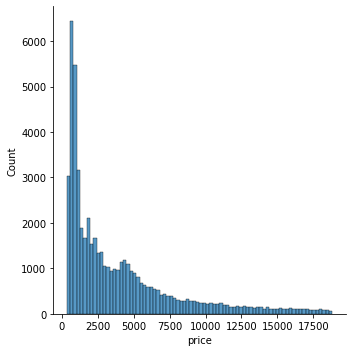

In [26]:
#Examine distribution of target variable
sns.displot(Diamonds['price'])

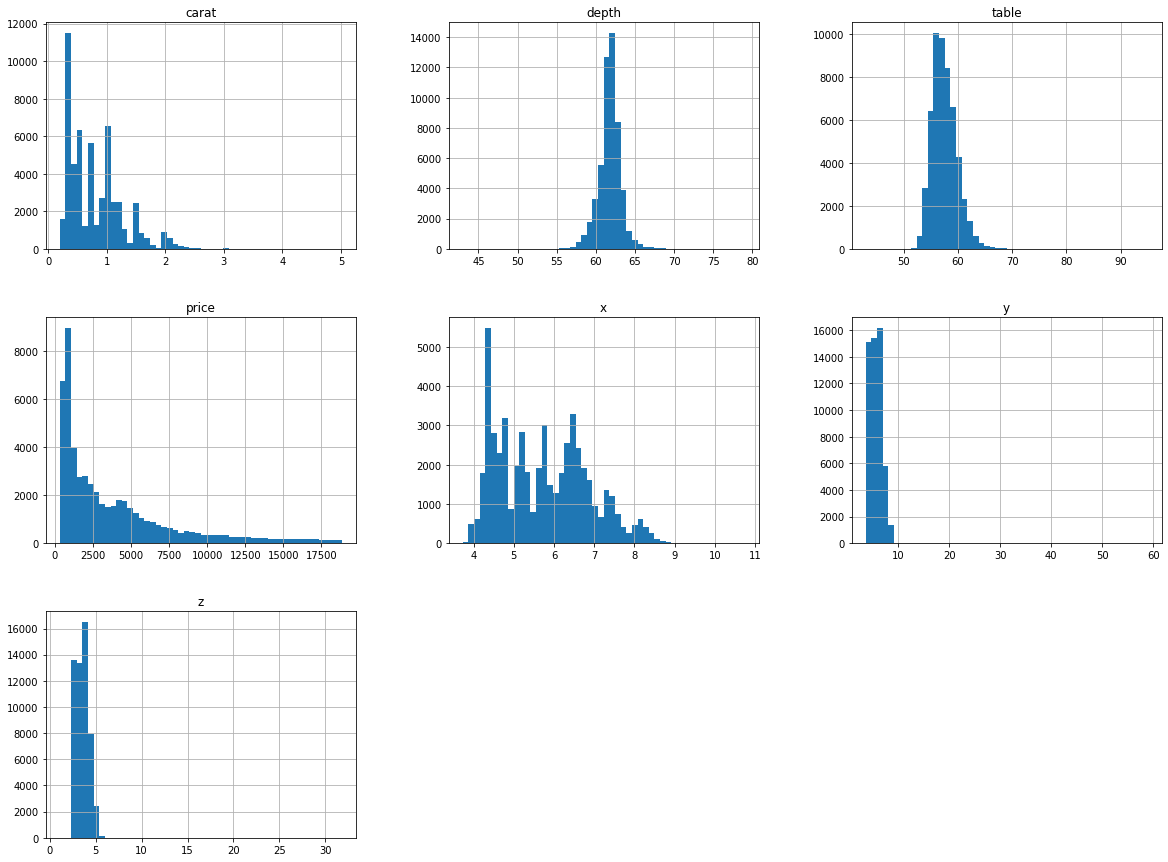

In [27]:
#Histogram for all columns
all_col_hist = Diamonds.hist(bins=50, figsize=(20,15))

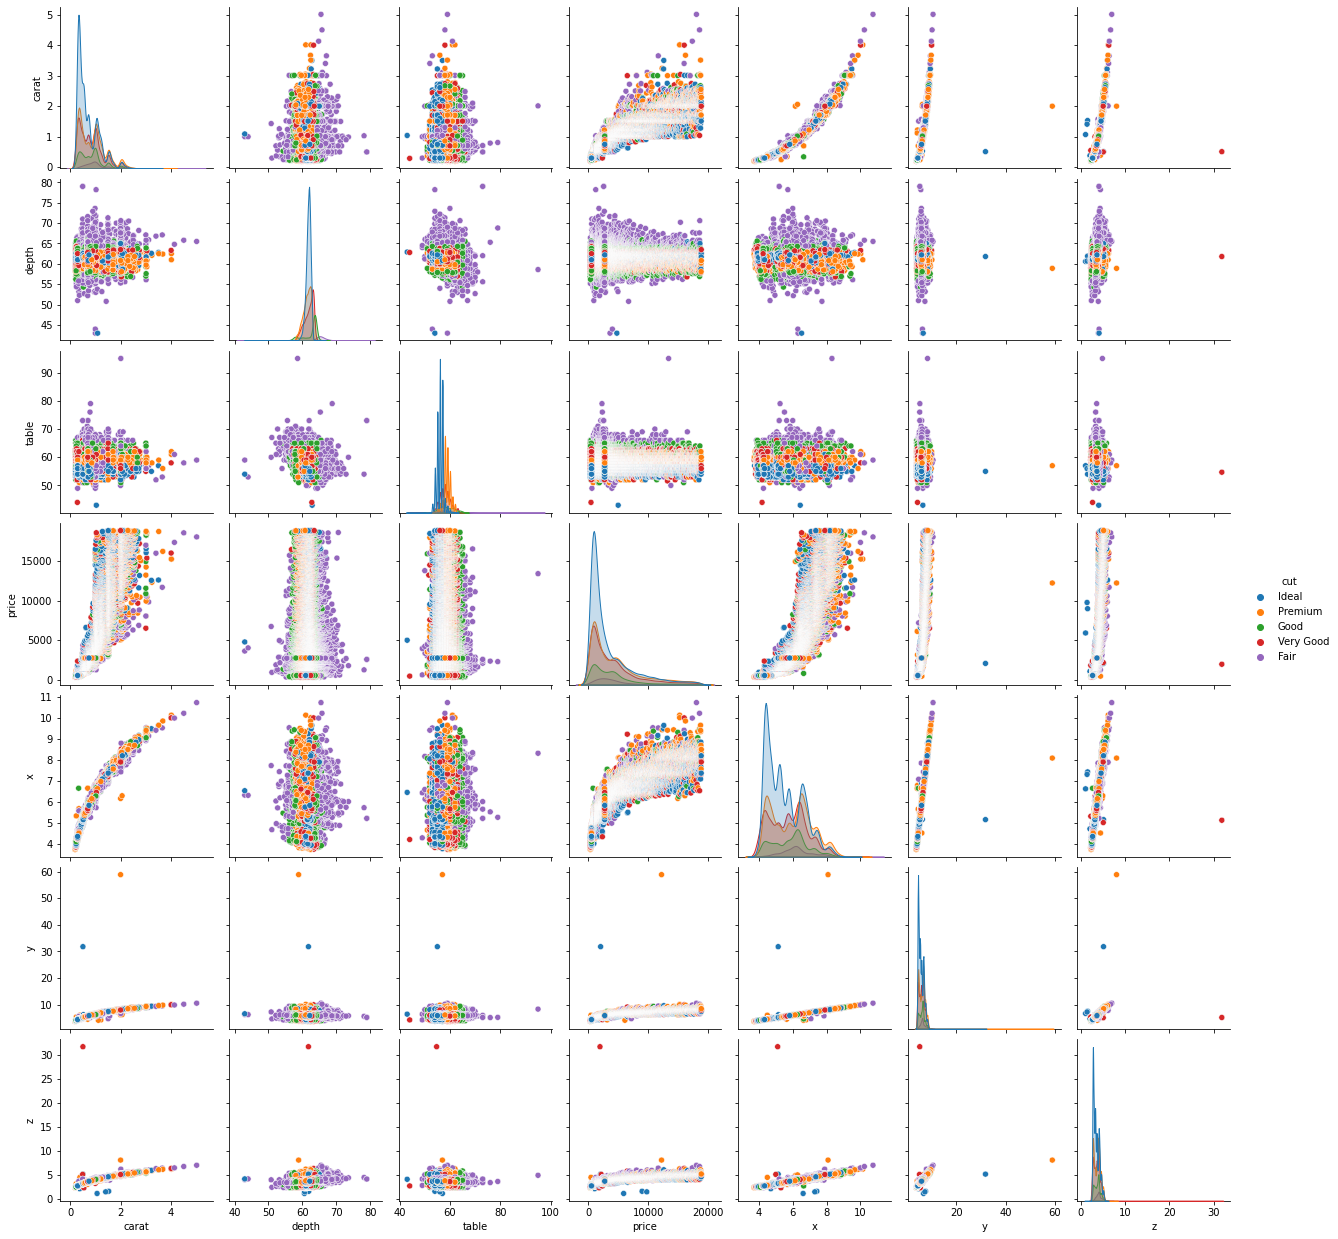

In [28]:
attributes = ["carat", "depth", "table", "price", "x" ,"y" ,"z","cut"]
sns.pairplot(Diamonds[attributes], hue='cut')

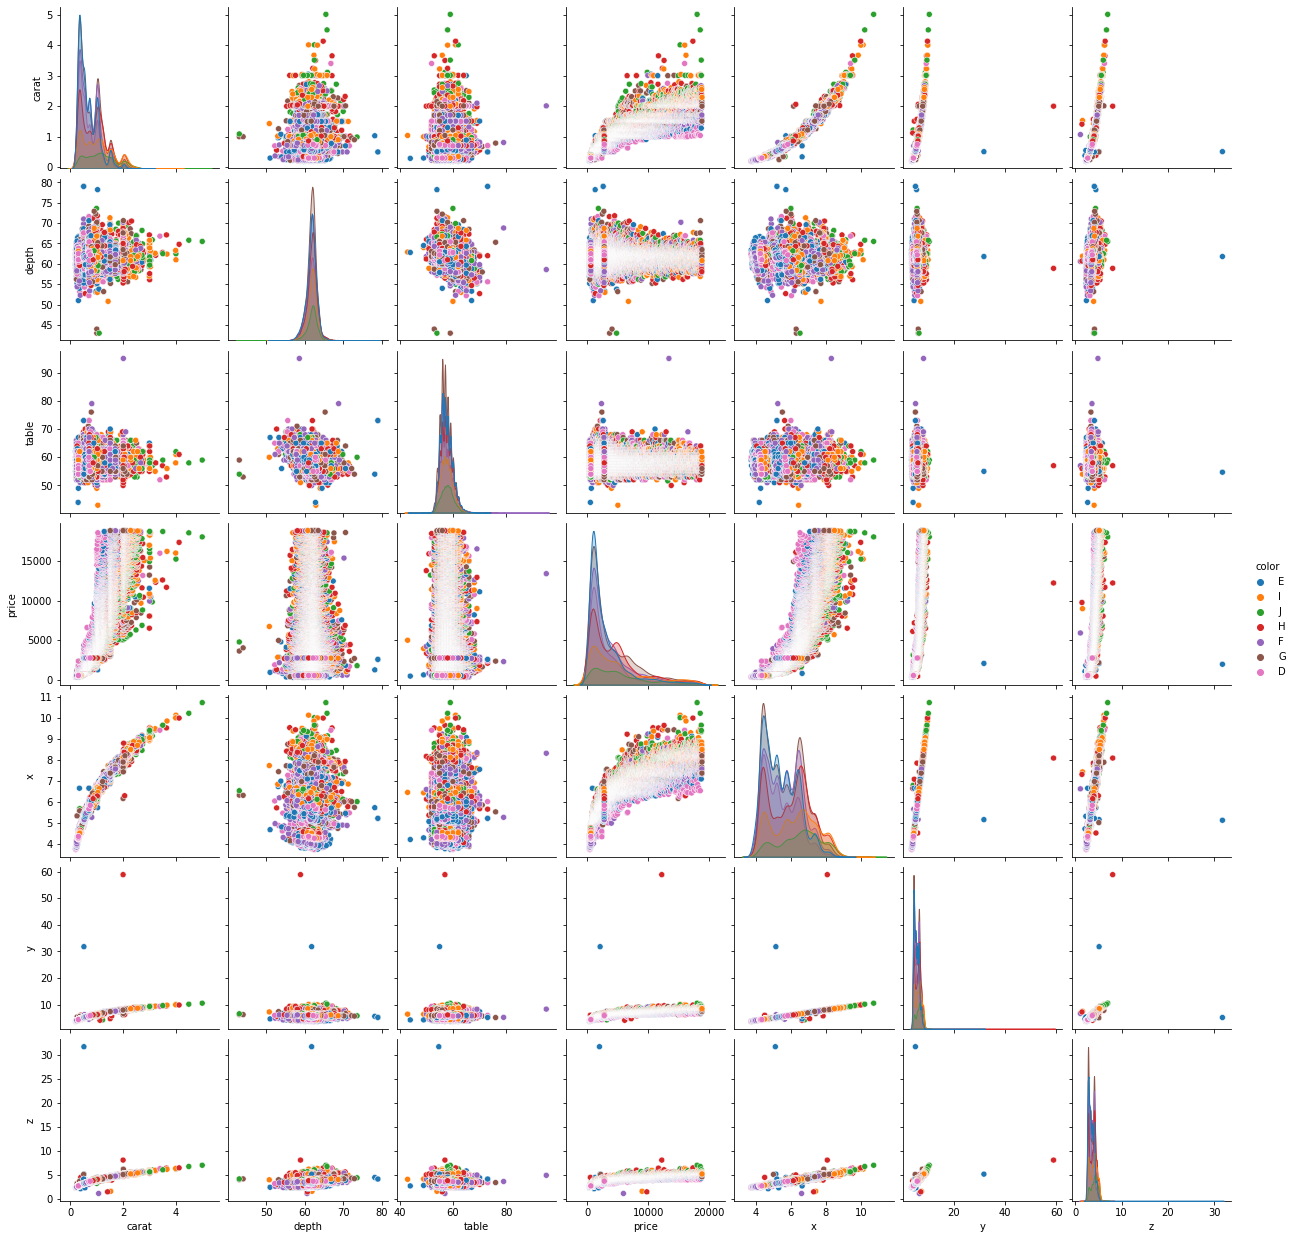

In [29]:
attributes = ["carat", "depth", "table", "price", "x" ,"y" ,"z","color"]
sns.pairplot(Diamonds[attributes], hue='color')

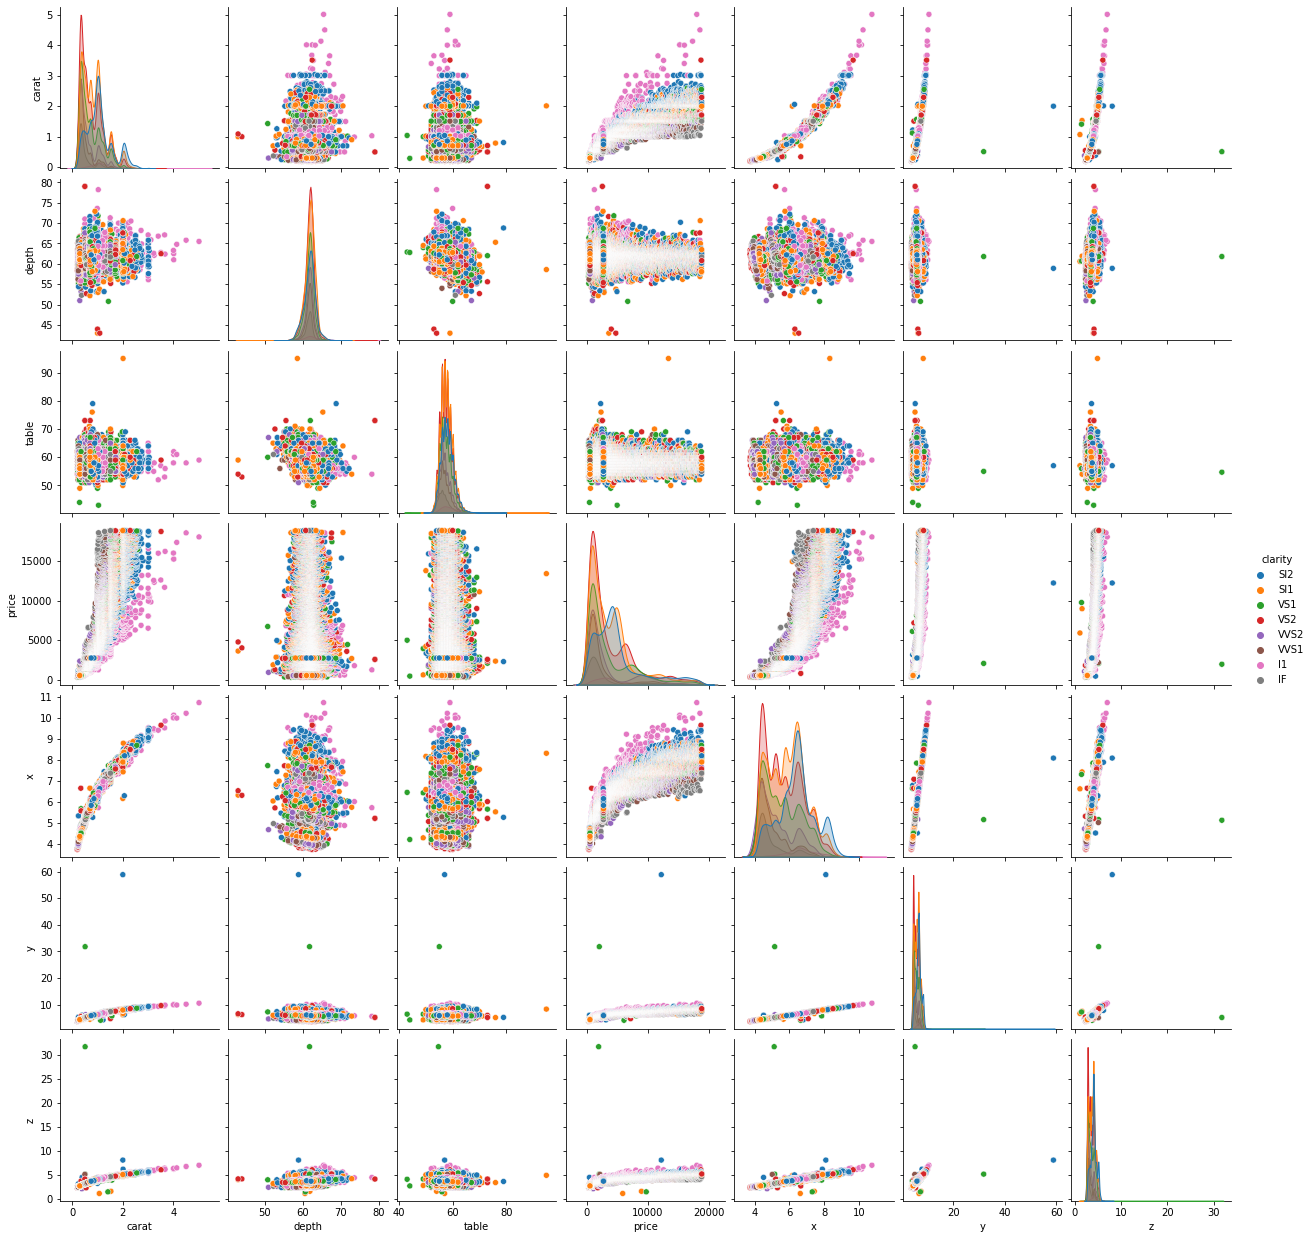

In [30]:
attributes = ["carat", "depth", "table", "price", "x" ,"y" ,"z","clarity"]
sns.pairplot(Diamonds[attributes], hue='clarity')

# x, y, z features and what field diamonds are in?

Text(0.5, 0, 'Z Label')

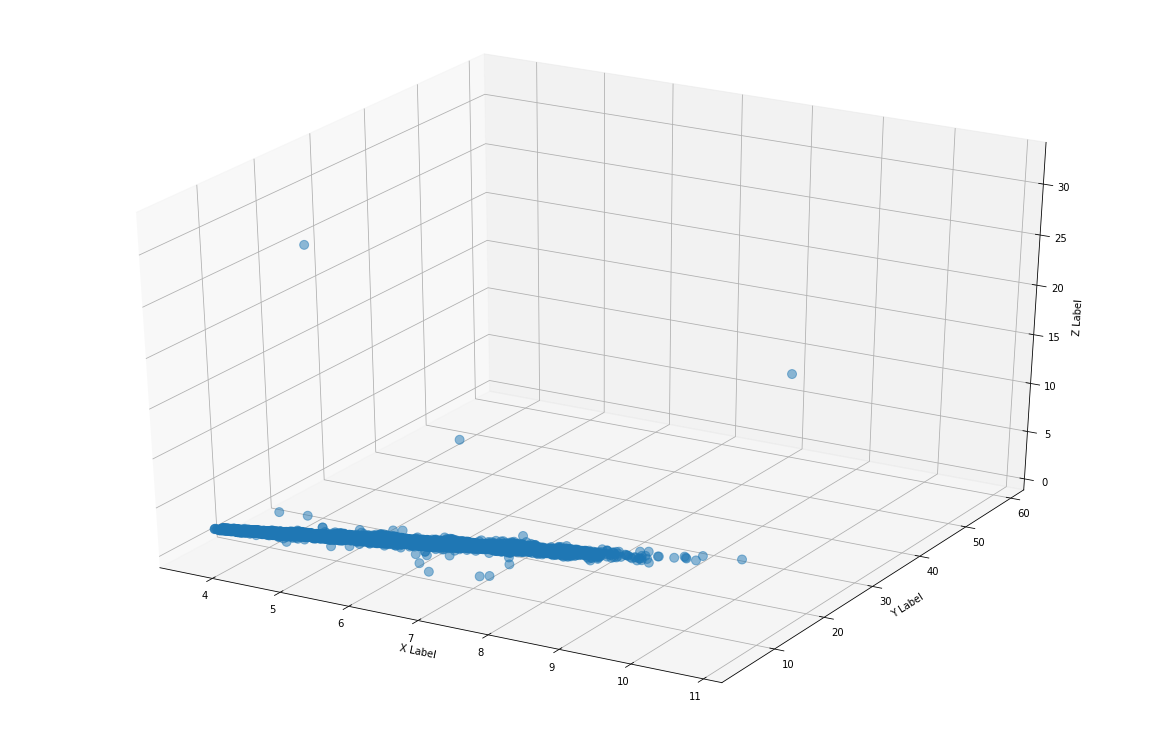

In [31]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16,10))
ax = Axes3D(fig)

# plot 3D
ax.scatter(xs=Diamonds['x'], ys=Diamonds['y'], zs=Diamonds['z'], s=80, alpha=0.5)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

In [32]:
Diamonds = Diamonds.drop(Diamonds.loc[Diamonds.y > 11].index)
Diamonds = Diamonds.drop(Diamonds.loc[Diamonds.z > 9].index)

Text(0.5, 0, 'Z Label')

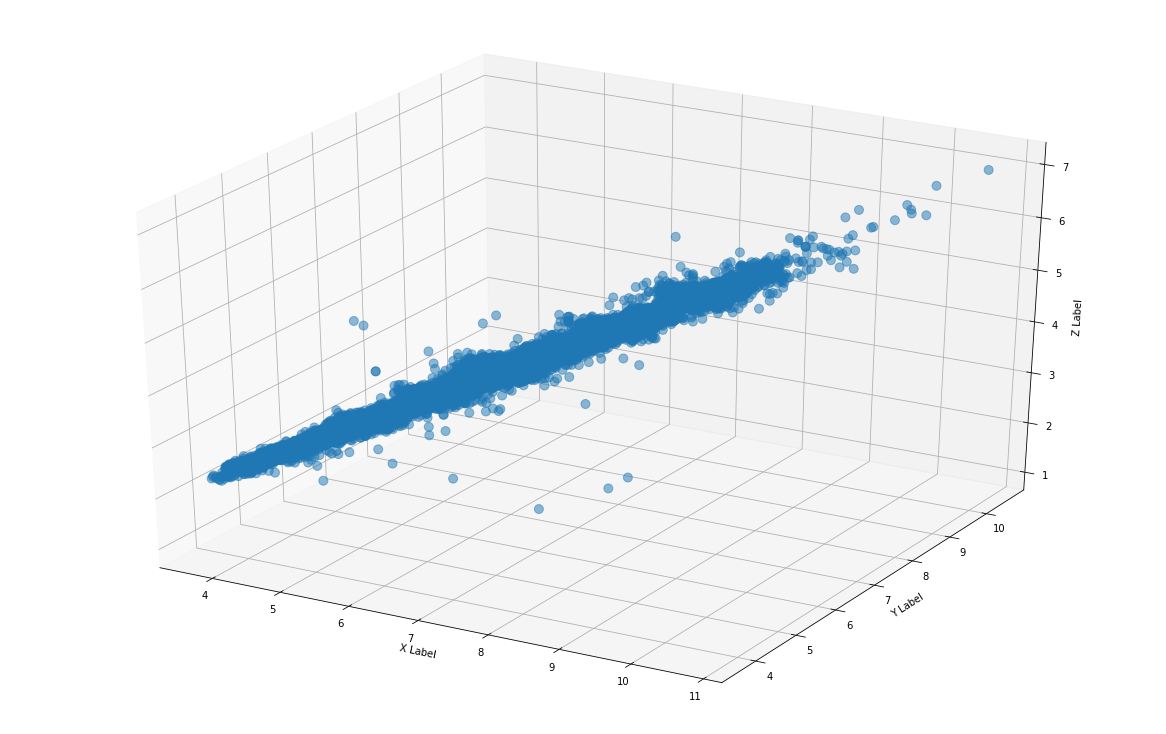

In [33]:
fig = plt.figure(figsize=(16,10))
ax = Axes3D(fig)

# plot 3D
ax.scatter(xs=Diamonds['x'], ys=Diamonds['y'], zs=Diamonds['z'], s=80, alpha=0.5)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Encoding Categorical Variable

In [34]:
#replace the cut category with numbers 1-5
cut_map = {'Fair':1,'Good':2,'Very Good':3, 'Premium':4,'Ideal':5}
Diamonds["cut"] = Diamonds["cut"].map(cut_map)

#replace the color category with numbers 1-7
color_map = {'J':1,'I':2, 'H':3,'G':4,'F':5,'E':6,'D':7}
Diamonds["color"] = Diamonds["color"].map(color_map)

#replace the clarity category with numbers 1-8
clarity_map = {'I1':1,'SI2':2,'SI1':3,'VS2':4,'VS1':5,'VVS2':6,'VVS1':7,'IF':8}
Diamonds["clarity"] = Diamonds["clarity"].map(clarity_map)

# Relationship between volume and price.

In [35]:
#add a new volume feature
Diamonds['volume'] = Diamonds['x']*Diamonds['y']*Diamonds['z']

Text(0.5, 1.0, 'Volume - Price')

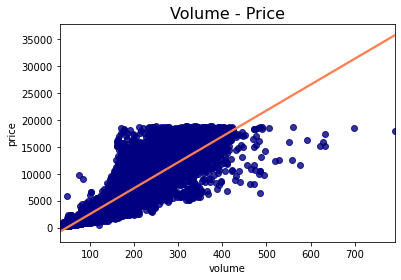

In [36]:
fig = sns.regplot(x="volume", y="price", data=Diamonds, fit_reg=True, scatter_kws={"color": "navy"}, line_kws={"color": "coral"})
fig.set_title('Volume - Price',fontdict={'fontsize': 16,'fontweight':20})

# Correlation between the features

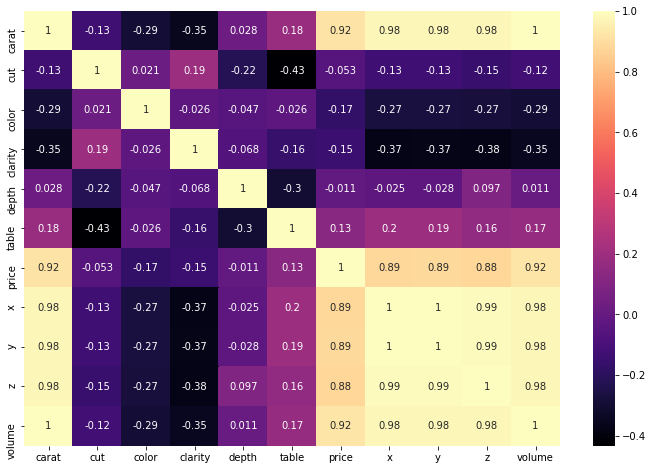

In [37]:
#calculate correlation of features
fig, ax = plt.subplots(figsize=(12,8))

sns.heatmap(Diamonds.corr(), annot = True, cmap = "magma", ax = ax)

In [38]:
#Drop X, Y, Z

Diamonds = Diamonds.drop(['x', 'y', 'z'], axis = 1) 

# Model

In [39]:
#split the data into training and test dataset.
from sklearn.model_selection import train_test_split
X = Diamonds.drop(['price'], axis = 1)
y = Diamonds.price

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2)

#function to display the predicted price difference from their real price.

def differencePlot(y_test, y_predict, c1, c2):
    fig, ax = plt.subplots(figsize=(10,6))
    ax.set(xlabel = 'Predicted Price', ylabel = 'Actual Price - Predicted Price',
           title = 'between what is desired and what is present')
    ax.scatter(y_predict, y_test - y_predict, alpha = 0.15, color = c1)
    ax.axhline(y = 0, color = c2)

# Linear Regression

In [40]:
#The "linear regression" formula calculates the straight line passing through the points in the sample.
#The line is calculated in such a way that the sum of the squares of the distances of the points from the line is the smallest.

reg = LinearRegression()
# fit the model
reg.fit(X_train, y_train)
# predict the prices of X_test
lin_y_pred=reg.predict(X_test)


In [41]:
print('R2_train          : ', reg.score(X_train, y_train))

R2_train          :  0.9044234416716272


In [42]:
# print the accuracy by each measure:
print('Linear regression accuracy: ')
msel = mean_squared_error(y_test, lin_y_pred)
rmsel = mean_squared_error(y_test, lin_y_pred)**0.5
mael = mean_absolute_error(y_test, lin_y_pred)
r2l = r2_score(y_test, lin_y_pred)

print('R2_test       : ', r2l)
print('MAE           : ', mael)
print('MSE (RMSE)    : ', msel,' (',rmsel,')')

Linear regression accuracy: 
R2_test       :  0.9093178059001588
MAE           :  835.6179927353758
MSE (RMSE)    :  1429231.6781145395  ( 1195.5047796284796 )


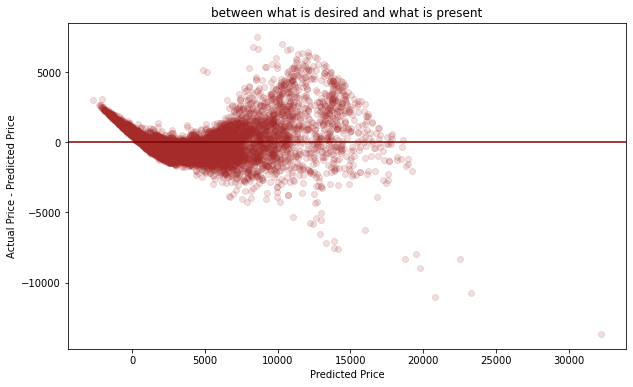

In [43]:
differencePlot(y_test, lin_y_pred, 'brown', 'maroon')

# Random Forest Regressor

In [44]:
#This model works differently from that of the "linear regression"
#and determines the price of the diamond based on decision trees.

rf = RandomForestRegressor()
# fit the model
rf.fit(X_train, y_train)
# predict the prices of X_test
rf_pre =rf.predict(X_test)

In [45]:
print('R2_train          : ',rf.score(X_train, y_train))

R2_train          :  0.997370830933719


In [46]:
# print the accuracy by each measure:
print('Random Forest Regressor accuracy: ')

mser = mean_squared_error(y_test, rf_pre)
rmser = mean_squared_error(y_test, rf_pre)**0.5
maer = mean_absolute_error(y_test, rf_pre)
r2r = r2_score(y_test, rf_pre)
print('R2_test       : ', r2r)
print('MAE           : ', maer)
print('MSE (RMSE)    : ', mser,' (',rmser,')')

Random Forest Regressor accuracy: 
R2_test       :  0.9825692559650079
MAE           :  272.06714262943257
MSE (RMSE)    :  274723.96091881057  ( 524.1411650679715 )


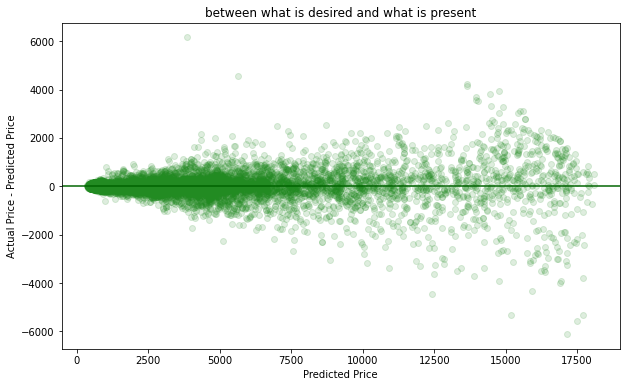

In [47]:
differencePlot(y_test, rf_pre, 'forestgreen', 'darkgreen')

# DecisionTree Regressor

In [48]:
Dt = DecisionTreeRegressor(random_state = 0)
# fit the model
Dt.fit(X_train, y_train)
# predict the prices of X_test
Dt_pre =Dt.predict(X_test)

In [49]:
print('R2_train          : ',Dt.score(X_train, y_train))

R2_train          :  0.999927410315668


In [50]:
# print the accuracy by each measure:
print('Decision Tree Regressor accuracy: ')
mser = mean_squared_error(y_test, Dt_pre)
rmser = mean_squared_error(y_test, Dt_pre)**0.5
maer = mean_absolute_error(y_test, Dt_pre)
r2r = r2_score(y_test, Dt_pre)

print('R2_test       : ', r2r)
print('MAE           : ', maer)
print('MSE (RMSE)    : ', mser,' (',rmser,')')

Decision Tree Regressor accuracy: 
R2_test       :  0.9701005839925323
MAE           :  339.8743972551929
MSE (RMSE)    :  471241.27221655543  ( 686.4701539153435 )


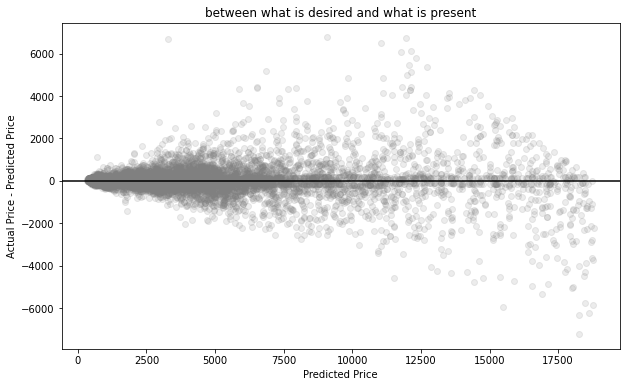

In [51]:
differencePlot(y_test, Dt_pre, 'gray', 'black')

# End of the Project